In [1]:
"""
Grad Cam Examples: 
"""
from gradcam import * 
from model import *

In [2]:
img = cv2.imread("crowd.jpg")


my_model = models.vgg16(pretrained=True)
model_1 = models.vgg16(pretrained=True)
second_model = CSRNet()
# second_model.load_state_dict(torch.load('checkpoints/shaghai_tech_a_best.pth')) # GPU
torch.load('checkpoints/shaghai_tech_a_best.pth', map_location=lambda storage, loc: storage) #CPU

my_model.features = second_model.frontend
MaxPoolLayer = nn.MaxPool2d(kernel_size=2, stride=2,padding=0 , dilation=1 , ceil_mode=False )
my_model.features.add_module("pool mod" , MaxPoolLayer)
my_model.features.add_module("pool mod 2", MaxPoolLayer)


Cam Shape (224, 224, 3)


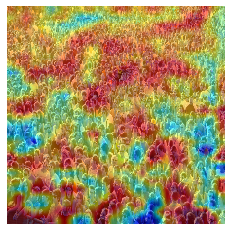

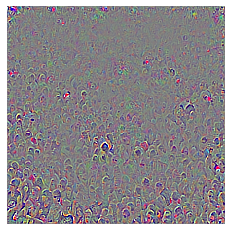

In [3]:
"""
Test Our Model 
"""
grad_cam = GradCam(model=my_model,target_layer_names=["21"], use_cuda=False)

img = np.float32(cv2.resize(img, (224, 224))) / 255
input = preprocess_image(img)

# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested index.
target_index = None
mask = grad_cam(input, target_index)

show_cam_on_image(img, mask)

gb_model = GuidedBackpropReLUModel(model=my_model, use_cuda=False)
gb = gb_model(input, index=target_index)
gb = gb.transpose((1, 2, 0))

gb = deprocess_image(gb)

#plt.title('Guided Back Propagation')
plt.axis("off")
plt.imshow(gb)
plt.show()


Cam Shape (224, 224, 3)


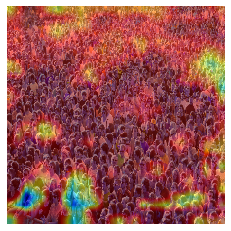

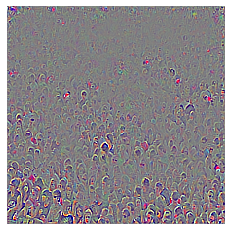

In [4]:
grad_cam = GradCam(model=models.vgg16(pretrained=True),target_layer_names=["21"], use_cuda=False)

#img = np.float32(cv2.resize(img, (224, 224))) / 255
#input = preprocess_image(img)

# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested index.
target_index = None
mask = grad_cam(input, target_index)

show_cam_on_image(img, mask)

gb_model = GuidedBackpropReLUModel(model=models.vgg16(pretrained=True), use_cuda=False)
gb = gb_model(input, index=target_index)
gb = gb.transpose((1, 2, 0))

gb = deprocess_image(gb)

#plt.title('Guided Back Propagation')
plt.axis("off")
plt.imshow(gb)
plt.show()